In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import set_config
set_config(display='diagram')

# Dataset California Housing

In [46]:
df_housing = pd.read_csv("../../Semana2/data/housing.csv")

In [47]:
df_housing.shape

(20640, 10)

In [48]:
df_housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [49]:
df_housing.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


## Separar los datos en entrenamiento y prueba

El código siguiente utiliza la función pd.cut() para crear un atributo `income_cat` con cinco categorías (etiquetadas de 1 a 5): la categoría 1 va de 0 a 1,5 (es decir, menos de 15.000 $), la categoría 2 de 1,5 a 3, etc.

In [50]:
df_housing["income_cat"] = pd.cut(df_housing["median_income"], 
                                bins=[0., 1.5, 3.0, 4.5, 6., np.inf], 
                                labels=[1, 2, 3, 4, 5])
df_housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3


Text(0.5, 0, 'Income category')

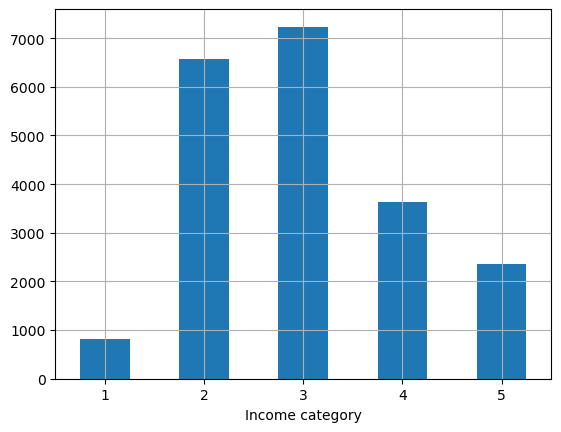

In [51]:
df_housing["income_cat"].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("Income category")

Ahora que tenemos la columna `income_cat` en categorías, podemos dividir los datos de manera estratificada.

In [52]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df_housing, test_size=0.2, random_state=42, shuffle=True, stratify=df_housing['income_cat'])
print(train_set.shape)
print(test_set.shape)

(16512, 11)
(4128, 11)


In [53]:
for set_ in (train_set, test_set):
    set_.drop("income_cat", axis=1, inplace=True)

In [54]:
housing = train_set.copy()

In [55]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

## Preparar los datos para usar con nuestros algoritmos de ML

### Datos de entrenamiento

In [56]:
housing_train = housing.drop("median_house_value", axis=1)
target_train = housing["median_house_value"].copy()

### Datos de prueba

In [57]:
housing_test = test_set.drop("median_house_value", axis=1)
target_test = test_set["median_house_value"].copy()

### Datos faltantes, Atributos categóricos, Normalización de los datos


### Hacemos el análisis con los datos de entrenamiento

In [58]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

In [59]:
housing_num = housing_train.drop("ocean_proximity", axis=1)

**Pipeline numérico**

In [60]:
from sklearn.pipeline import Pipeline

pipeline_num = Pipeline(
    [
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ]
)

**Pipeline completo**

In [61]:
from sklearn.compose import ColumnTransformer

atributos_num = list(housing_num)
atributos_cat = ["ocean_proximity"]

pipeline_full = ColumnTransformer(
    transformers= [
        ("num", pipeline_num, atributos_num),
        ("cat", OneHotEncoder(handle_unknown = 'ignore'), atributos_cat)
    ]
)

## Regresión Lineal

Utilice el conjunto de datos California Housing para entrenar 3 modelos de regresión lineal:
- Univariada: usando un atributo (por ejemplo el más correlacionado). Grafique la recta de regresión obtenida.
- Bivariada: seleccione 2 atributos
- Multivariada: todos los atributos 

El **Error Cuadrático Medio (MSE)** es una medida cuantitativa útil para comparar diferentes modelos de regresión. 

$$MSE = \frac{1}{N}\sum_{i=1}^{n}(y^{(i)} - \hat y^{(i)})^2$$


- Comparar la raiz cuadrada del MSE obtenido en los 3 casos con los datos de entrenamiento y prueba, usar la función **mean_squared_error**.

En algunos casos, es más útil reportar el coeficiente de determinación $(R^2)$, el cual puede ser entendido como una versión estandarizada del MSE.

$$R^2 = 1- \frac{SSE}{SST}$$


SSE es la suma de los errores cuadráticos y SST la suma total de los cuadrados. $SST = \sum_{i=1}^{n}(y^{(i)} - \mu_y)^2$

Para el dataset de entrenamiento, $R^2$ está limitado entre 0 y 1, pero puede volverse negativo para los datos de prueba. 

- Comparar los modelos entrenados con esta medida con los datos de entrenamiento y prueba, usando la función **r2_score**

In [62]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.pipeline import make_pipeline

In [63]:
lin_reg = make_pipeline(pipeline_full, LinearRegression())
lin_reg.fit(housing_train, target_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  ['longitude', 'latitude',
                                                   'housing_median_age',
                                                   'total_rooms',
                                                   'total_bedrooms',
                                                   'population', 'households',
                                                   'median_income']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['ocean_proximity'])])),
                ('linearregression', LinearRegression())])

In [64]:
predicciones = lin_reg.predict(housing_train)
predicciones[:5].round() 

array([ 88983., 305351., 153335., 184303., 246840.])

In [65]:
target_train.iloc[:5].values

array([ 72100., 279600.,  82700., 112500., 238300.])

In [66]:
lin_rmse = mean_squared_error(target_train, predicciones, squared=False)
lin_rmse

69050.56219504567

## Usamos un árbol de regresión

In [67]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = make_pipeline(pipeline_full, DecisionTreeRegressor(random_state=42))
tree_reg.fit(housing_train, target_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  ['longitude', 'latitude',
                                                   'housing_median_age',
                                                   'total_rooms',
                                                   'total_bedrooms',
                                                   'population', 'households',
                                                   'median_income']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['ocean_proximity'])])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

In [68]:
predicciones = tree_reg.predict(housing_train)
tree_rmse = mean_squared_error(target_train, predicciones,squared=False)
tree_rmse

0.0

Se ajusta mucho a nuestros datos de entrenamiento, pero sabemos que no es lo más deseado

In [69]:
pred_test = tree_reg.predict(housing_test)
tree_rmse_test = mean_squared_error(target_test, pred_test,squared=False)
tree_rmse_test

69203.52536476958

**Desempeño usando validación cruzada**

¿Por qué en negativo? Porque el más pequeño es el mejor.

In [70]:
from sklearn.model_selection import cross_val_score

tree_rmses = cross_val_score(tree_reg, housing_train, target_train, scoring="neg_root_mean_squared_error", cv=10)
tree_rmses

array([-71152.59187256, -70068.70314956, -64901.96987894, -68783.02168675,
       -66944.32525877, -68260.00359756, -71031.16291424, -69086.59778928,
       -67252.39727946, -73247.28194339])

El desempeño en este caso será:

In [71]:
print("Valor medio del RMSE:", -tree_rmses.mean())
print("Desvío estándar del RMSE:", tree_rmses.std())

Valor medio del RMSE: 69072.80553705241
Desvío estándar del RMSE: 2292.678273223765


## Usamos regresión con RandomForest

In [72]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = make_pipeline(pipeline_full, RandomForestRegressor(random_state=42))
forest_rmses = cross_val_score(forest_reg, housing_train, target_train, scoring="neg_root_mean_squared_error", cv=10)
forest_rmses

array([-50842.25929218, -48736.21982439, -45939.13789086, -50533.88252324,
       -47405.46903623, -49610.34435098, -51671.17833028, -48620.51110178,
       -47379.77529752, -53236.82572324])

In [73]:
print("Valor medio del RMSE:", -forest_rmses.mean())
print("Desvío estándar del RMSE:", forest_rmses.std())

Valor medio del RMSE: 49397.56033707019
Desvío estándar del RMSE: 2106.530429964768


In [74]:
forest_reg.fit(housing_train, target_train)
predicciones = forest_reg.predict(housing_train)
forest_rmse = mean_squared_error(target_train, predicciones,squared=False)
forest_rmse

18342.366362322846

De la documentación de [RandomForestRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html) podemos ver que la clase posee muchos parámetros para modificar:
- **n_estimators:** número de árboles
- **max_features**: el número de atributos que se usan para hacer crecer el árbol
- **bootstrap**: Si se utiliza un subconjunto de los datos o el dataset completo
    - Si es false usa todos, si es true submuestre

In [75]:
n_arboles = [3,10,30]
n_atributos = [2,3,4,6,8]

In [76]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# forest_reg = make_pipeline(pipeline_full, RandomForestRegressor(random_state=42))
RF = RandomForestRegressor(random_state=42)
forest_reg = Pipeline(
    [
        ("preprocessing", pipeline_full),
        ("regressor", RF),
    ]
)

In [77]:
forest_reg.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'preprocessing', 'regressor', 'preprocessing__n_jobs', 'preprocessing__remainder', 'preprocessing__sparse_threshold', 'preprocessing__transformer_weights', 'preprocessing__transformers', 'preprocessing__verbose', 'preprocessing__verbose_feature_names_out', 'preprocessing__num', 'preprocessing__cat', 'preprocessing__num__memory', 'preprocessing__num__steps', 'preprocessing__num__verbose', 'preprocessing__num__imputer', 'preprocessing__num__std_scaler', 'preprocessing__num__imputer__add_indicator', 'preprocessing__num__imputer__copy', 'preprocessing__num__imputer__fill_value', 'preprocessing__num__imputer__missing_values', 'preprocessing__num__imputer__strategy', 'preprocessing__num__imputer__verbose', 'preprocessing__num__std_scaler__copy', 'preprocessing__num__std_scaler__with_mean', 'preprocessing__num__std_scaler__with_std', 'preprocessing__cat__categories', 'preprocessing__cat__drop', 'preprocessing__cat__dtype', 'preprocessing__cat__handle_u

In [78]:
grid = [
{'regressor__n_estimators': n_arboles, 'regressor__max_features': n_atributos}, # 3x5 combinaciones
{'regressor__bootstrap': [False], 'regressor__n_estimators': n_arboles, 'regressor__max_features': n_atributos},
]

grid_search = GridSearchCV(estimator=forest_reg, param_grid=grid, cv=3, scoring="r2")
grid_search

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('std_scaler',
                                                                                          StandardScaler())]),
                                                                         ['longitude',
                                                                          'latitude',
                                                                          'housing_median_age',
                                                                          'total_rooms',
                                                                          'total_bedrooms',
                                                                          'population',
                                                                          'households',
                                                                          'median_income']),
                                                                        ('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['ocean_proximity'])])),
                                       ('regressor',
                                        RandomForestRegressor(random_state=42))]),
             param_grid=[{'regressor__max_features': [2, 3, 4, 6, 8],
                          'regressor__n_estimators': [3, 10, 30]},
                         {'regressor__bootstrap': [False],
                          'regressor__max_features': [2, 3, 4, 6, 8],
                          'regressor__n_estimators': [3, 10, 30]}],
             scoring='r2')

In [79]:
grid_search.fit(housing_train, target_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('std_scaler',
                                                                                          StandardScaler())]),
                                                                         ['longitude',
                                                                          'latitude',
                                                                          'housing_median_age',
                                                                          'total_rooms',
                                                                          'total_bedrooms',
                                                                          'population',
                                                                          'households',
                                                                          'median_income']),
                                                                        ('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['ocean_proximity'])])),
                                       ('regressor',
                                        RandomForestRegressor(random_state=42))]),
             param_grid=[{'regressor__max_features': [2, 3, 4, 6, 8],
                          'regressor__n_estimators': [3, 10, 30]},
                         {'regressor__bootstrap': [False],
                          'regressor__max_features': [2, 3, 4, 6, 8],
                          'regressor__n_estimators': [3, 10, 30]}],
             scoring='r2')

In [80]:
grid_search.best_params_

{'regressor__bootstrap': False,
 'regressor__max_features': 4,
 'regressor__n_estimators': 30}

In [81]:
grid_search.best_estimator_

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  ['longitude', 'latitude',
                                                   'housing_median_age',
                                                   'total_rooms',
                                                   'total_bedrooms',
                                                   'population', 'households',
                                                   'median_income']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['ocean_proximity'])])),
                ('regressor',
                 RandomForestRegressor(bootstrap=False, max_features=4,
                                       n_estimators=30, random_state=42))])

In [82]:
cv_res = pd.DataFrame(grid_search.cv_results_)
cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)
cv_res

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_regressor__max_features,param_regressor__n_estimators,param_regressor__bootstrap,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
23,0.828840,0.008857,0.034474,0.000227,4,30,False,"{'regressor__bootstrap': False, 'regressor__ma...",0.818666,0.810144,0.809104,0.812638,0.004284,1
26,1.163365,0.028450,0.035693,0.001254,6,30,False,"{'regressor__bootstrap': False, 'regressor__ma...",0.813115,0.812669,0.810701,0.812162,0.001049,2
11,0.687877,0.034404,0.029145,0.000305,6,30,NaN,"{'regressor__max_features': 6, 'regressor__n_e...",0.811376,0.811295,0.806186,0.809619,0.002428,3
14,0.863470,0.025347,0.028981,0.000485,8,30,NaN,"{'regressor__max_features': 8, 'regressor__n_e...",0.813042,0.808582,0.805115,0.808913,0.003245,4
20,0.620815,0.016161,0.033082,0.000952,3,30,False,"{'regressor__bootstrap': False, 'regressor__ma...",0.817923,0.806610,0.800576,0.808370,0.007190,5
8,0.537676,0.027602,0.031749,0.001546,4,30,NaN,"{'regressor__max_features': 4, 'regressor__n_e...",0.813128,0.800960,0.804266,0.806118,0.005137,6
29,1.447649,0.033099,0.033512,0.002025,8,30,False,"{'regressor__bootstrap': False, 'regressor__ma...",0.804882,0.805816,0.803559,0.804752,0.000926,7
5,0.442630,0.016616,0.032111,0.001866,3,30,NaN,"{'regressor__max_features': 3, 'regressor__n_e...",0.806827,0.800270,0.793716,0.800271,0.005352,8
17,0.469144,0.008868,0.032782,0.000242,2,30,False,"{'regressor__bootstrap': False, 'regressor__ma...",0.806261,0.796375,0.793902,0.798846,0.005339,9
25,0.397251,0.004593,0.014701,0.000094,6,10,False,"{'regressor__bootstrap': False, 'regressor__ma...",0.802837,0.792742,0.795911,0.797163,0.004215,10
